In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:

X_test.shape

(10000, 32, 32, 3)

In [4]:

y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

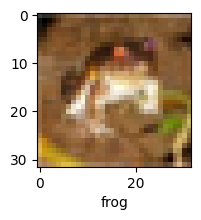

In [13]:
plot_sample(X_train,y_train,0)

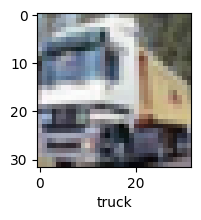

In [14]:
plot_sample(X_train, y_train, 1)

In [15]:

X_train = X_train / 255.0
X_test = X_test / 255.0

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


C:\Users\HP\anaconda3\envs\lokesh\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
cnn.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [20]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3548 - loss: 1.7614
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.5976 - loss: 1.1526
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6390 - loss: 1.0294
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6746 - loss: 0.9370
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6989 - loss: 0.8640
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7148 - loss: 0.8225
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7292 - loss: 0.7752
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7490 - loss: 0.7185
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7644 - loss: 0.6807
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7736 - loss: 0.6527


In [21]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7021 - loss: 0.8924


[0.8969703912734985, 0.7050999999046326]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[2.09449604e-03, 2.26567543e-04, 6.93089387e-04, 9.04733539e-01,
        4.39699623e-04, 6.78740516e-02, 2.08881777e-02, 1.28254038e-03,
        1.51869119e-03, 2.49069824e-04],
       [4.88988450e-03, 1.46652823e-02, 6.27233817e-07, 4.08336227e-08,
        3.15855075e-08, 1.99096295e-09, 3.97831962e-10, 2.17449774e-08,
        9.79870677e-01, 5.73532714e-04],
       [4.27515842e-02, 2.78554887e-01, 5.40177105e-04, 2.92847806e-04,
        7.36314338e-04, 1.49605054e-04, 1.31613764e-04, 2.17849854e-03,
        6.30436838e-01, 4.42275740e-02],
       [8.48240018e-01, 9.56079643e-03, 2.76361359e-03, 4.69138176e-05,
        4.98239096e-05, 3.00144643e-06, 5.60419248e-05, 5.67280586e-05,
        1.39196754e-01, 2.62699577e-05],
       [7.34633750e-06, 3.19272331e-05, 8.95888545e-03, 1.16743550e-01,
        1.60600632e-01, 3.56821828e-02, 6.77700996e-01, 1.78940929e-04,
        8.07474353e-05, 1.48356385e-05]], dtype=float32)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]

In [25]:
y_classes[:5]

[3, 8, 8, 0, 6]

In [26]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)